### Leerdoelen
- Je leert welke onderdelen in een goede Data Understanding thuis horen.
- Je gaat zelf een rapport maken waar een goede Data Understanding in zit. 
- Je kan met Pandas data inlezen en bewerken. 
- Je kan met Seaborn of matplotlib visualisaties maken van de data. 

### Achtergrondinformatie:
- Google naar 
    - `pandas read csv file`
    - `pandas dataframe make histogram`
    - `pandas correlation`
    - `seaborn correlation plot`
    - `seaborn pair plot`
    - `pandas dataframe plot variables`
- Datacamp course `Manipulating data with Pandas`, `Introduction to Data Visualisation with Python` en eventueel `Data Visualization with Seaborn`. 

### Opdracht 
- Maak een Data Understanding hoofdstuk voor de gegeven KNMI dataset, gemodelleerd naar het voorbeeld wat je gekregen hebt. De data is een bewerkte versie van data gedownload van [deze link](http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi). 
- Leg uit (Trace&Explain) wat de code in `read_knmi_data` doet in elk van de stappen. 
- Als je een beeld van de data hebt, probeer iets te zeggen over het soort Business understanding wat je zou kunnen krijgen met deze data. 
- Data prepation, Modeling en Evaluation hoef je deze week niet aan te vullen. 

# Business understanding
Voor klimaatwetenschappers is het van groot belang om de ontwikkeling van het klimaat te volgen. Echte metingen kunnen trends laten zien, bijvoorbeeld een toename in het aantal extreme regenbuien. Een toename hiervan zou bijvoorbeeld gevolgen kunnen hebben voor de hoogte van de grote rivieren, en dus voor de benodigde hoogte van de dijken. 

De volgende dataset laat wat klimaatgegevens zien over de tijd. 

# Data Understanding
De data staat in een tekst bestand (.txt), maar na het openen van het bestand in een tekst editor is het duidelijk dat dit een csv bestand is. De functie `read_knmi_data` leest de knmi datafile in. 

## instellingen aanpassen
Als je gewend bent aan andere ontwikkelomgevingen dan heb je bijv. gemist dat de beschikbare objecten getoond worden en dat je deze automatisch kunt aanvullen. Hiervoor stellen we de completer in op 'greedy' m.b.v. zogenaamde Jupyter Notebook Magic. 

Om later ook de visualisaties in het Notebook te tonen zorgen we dat de output van het package matplotlib ook als (inline) output wordt getoond in het Notebook.

In [22]:
#handige jupyter notebook magic
%config IPCompleter.greedy = True  
%matplotlib inline

## initial data collection

De data in het tekst-bestand is een csv-bestand. We kunnen dit direct inlezen als csv-bestand in het Notebook.

Hiervoor maken we gebruik van de read_csv methode in pandas. 
- de file moet je altijd meegeven
- de separator is ook handig om expliciet aan te geven. Doe je dit niet, dan wordt een komma gebruikt.
- In dit tekstbestand staat de toelichting op de variabelen als commentaar. Deze regels moeten worden genegeerd bij het inlezen van de gegevens. Dit doen we door dit mee te geven als argument in de methode.
- De kolomnamen staan ook als commentaar aangegeven. We hebben hier twee mogelijke werkwijzen: 1) het bronbestand aanpassen door voor deze regel het commmentaar aan te passen. Nadeel: het is dan later niet navolgbaar wat er is aangepast in de aangeleverde data. We kiezen voor 2) de gegevens inlezen zonder de header van het csv-bestand. Daarna geven we de kolommen in ons DataFrame begrijpbare namen. 

**We moeten één van onderstaande manieren kiezen om de gegevens te importeren. Welke vinden jullie het geschiktst? Licht je antwoord toe.**

In [23]:
#pandas importeren in onze werkomgeving
import pandas as pd

In [24]:
#data files
data_source='knmi_data.txt'

In [25]:
knmi_data_1=pd.read_csv(data_source)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 14, saw 6


Bovenstaande code loopt vast met een `ParserError: Error tokenizing data.` Dit wordt veroorzaakt door het begin van de csv file. Hier staat commentaar, maar als dit niet expliciet aan `read_csv` meegegeven wordt dan krijg je deze foutmelding. Het issue is dat in het commentaar geen `,` staat, dus denkt `read_csv` dat alle data in 1 kolom thuishoort. Vanaf lijn 12 gaat dit mis, daar staan veel meer separators. De functie heeft nu een conflict, het eerst deel van de data heeft 1 kolom, vanaf lijn 12 6 kolommen. Hier kan de functie niet mee omgaan, en dus krijg je deze foutmelding. 

In [14]:
knmi_data_2=pd.read_csv(data_source,comment='#', header=None)

We voegen hier `comment='#'` toe om aan te geven dat deze regels in de data genegeerd kunnen worden. `header=None` verteld de functie dat er geen header regel is die de namen van de kolommen geeft. Dit lijkt wel zo te zijn, maar deze regel heeft een `#` voor zich. En dus valt deze weg als je `comment='#'` gebruikt. Als je `header=None` niet gebruikt wordt de eerste dataregel gebruikt als naam van de kolommen. 

In [13]:
# parse_dates: Let pandas try and transform this column to a date
knmi_data_3=pd.read_csv(data_source,sep=',', comment='#', header=None, parse_dates=[1])

We voegen hier `parse_dates=[1]` toe zodat deze tweede kolom als een echte datum ingelezen wordt. 

In [28]:
knmi_data_4=pd.read_csv(data_source,sep=',', comment='#', header=None, names=['station', 'datum', 'T_gem', 'T_min', 'T_max', 'Neerslag'], parse_dates=[1])
knmi_data_4=knmi_data_4.set_index(['station','datum'])

Hier voegen we kolomnamen toe, en zetten we `station` en `datum` in een index. Deze index maakt het mogelijk om via `.loc` snel stukken van de data te selecteren. 

In [27]:
def read_knmi_data(filename, names):
    return pd.read_csv(filename, 
                       comment='#',               # Skip all comments
                       header=None,               # No header
                       names=names,
                       skipinitialspace=True,     # Fix the trailing spaces after the ','-separator
                       index_col=[0,1],           # Use the first two columns as the row index
                       parse_dates=[1])           # Let pandas try and transform the second column to a date

knmi_data_5 = read_knmi_data(data_source, names=['station', 'datum', 'T_gem', 'T_min', 'T_max', 'Neerslag'])

Hier combineren we het zetten van de index ook nog in `read.csv`, en we stoppen alles in één functie. Dit maakt het makkelijker om de details rondom het inlezen van dit soort KNMI bestanden te verstoppen, en een centrale plek te maken waar je eventueel de code kan aanpassen. 

Ik kies voor de functie, deze leest de data accuraat in en maakt het makkelijk om de functie later weer her te gebruiken. 

In [26]:
knmi_data = knmi_data_5

## Data description

In de data zien we de volgende variabelen:

- T_gem, gemiddelde temperatuur per dag
- T_min, de minimum temperatuur per dag
- T_max, de maximum temperatuur per dag
- Neerslag, de hoeveelheid neerslag per dag
- station, het stations id (in de index)
- datum, de datum (in de index)

Als we wat verder in de data duiken:

[leg uit wat je gaat bekijken en waarom]

In [29]:
#code inclusief commentaar

[Welke inzichten haal je uit de output na het runnen van bovenstaande codecel? Leg dit uit.]

In [30]:
knmi_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3656 entries, (np.int64(278), Timestamp('2011-02-01 00:00:00')) to (np.int64(278), Timestamp('2021-02-03 00:00:00'))
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   T_gem     3656 non-null   int64
 1   T_min     3656 non-null   int64
 2   T_max     3656 non-null   int64
 3   Neerslag  3656 non-null   int64
dtypes: int64(4)
memory usage: 282.8 KB


Dezelfde informatie kun je ook in zes stappen verzamelen: 

In [31]:
len(knmi_data.columns)

4

In [32]:
knmi_data_5.columns

Index(['T_gem', 'T_min', 'T_max', 'Neerslag'], dtype='object')

En elke variabele heeft het volgende datatype:

In [33]:
len(knmi_data)

3656

In [34]:
knmi_data.dtypes

T_gem       int64
T_min       int64
T_max       int64
Neerslag    int64
dtype: object

In [35]:
knmi_data.notnull().sum()

T_gem       3656
T_min       3656
T_max       3656
Neerslag    3656
dtype: int64

In [36]:
knmi_data.isna().sum()

T_gem       0
T_min       0
T_max       0
Neerslag    0
dtype: int64

## BEGIN VAN opdracht 2 data exploration

## Statistische samenvatting

*simple statistical analyses* (bron CRISP-DM, p18)

In [37]:
knmi_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T_gem,3656.0,105.027899,61.939013,-121.0,60.0,103.0,153.0,280.0
T_min,3656.0,59.338074,56.406605,-179.0,19.0,60.5,103.0,198.0
T_max,3656.0,148.262856,73.191528,-54.0,92.0,147.0,204.0,393.0
Neerslag,3656.0,20.448578,41.534217,-1.0,0.0,1.0,22.0,556.0


andere stappen uit de data exploratie: 

In [38]:
knmi_data.head()

T_gem  T_min  T_max  Neerslag
station datum                                    
278     2011-02-01    -18    -38     11        15
        2011-02-02     29     11     40         3
        2011-02-03     52     30     80        14
        2011-02-04     90     61    109        16
        2011-02-05    114    107    120         0

Uit de exploratie moet in elk geval komen dat de temperaturen extreem lijken/in 0,1 graden in de data zitten.

Met een meting per dag beslaat dit 9 jaar aan data:

In [39]:
print(knmi_data.head(1))
print(knmi_data.tail(1))
all_ts = knmi_data.reset_index()['datum']   # Pak de datum uit de index
dt = all_ts.max() - all_ts.min()            # Trek min en max van elkaar af -> timedelta object
dt.days / 365.25                            # Van aantal dagen naar jaren

                    T_gem  T_min  T_max  Neerslag
station datum                                    
278     2011-02-01    -18    -38     11        15
                    T_gem  T_min  T_max  Neerslag
station datum                                    
278     2021-02-03     81     61     95       183


10.00684462696783

## Statistische kenmerken
De volgende tabel geeft een aantal simpele statistische eigenschappen van elke variabele:

In [40]:
knmi_data.describe()

,T_gem,T_min,T_max,Neerslag
count,3656.000000,3656.000000,3656.000000,3656.000000
mean,105.027899,59.338074,148.262856,20.448578
std,61.939013,56.406605,73.191528,41.534217
min,-121.000000,-179.000000,-54.000000,-1.000000
25%,60.000000,19.000000,92.000000,0.000000
50%,103.000000,60.500000,147.000000,1.000000
75%,153.000000,103.000000,204.000000,22.000000
max,280.000000,198.000000,393.000000,556.000000


Wat hier opvalt 

- de temperatuur erg hoog is. Dit is omdat het in 0.1 graden opgeslagen is, bv 108 is 10,8 graden C. 
- minimum temperauur is lager dan de gemiddelde temperatuur. Dit is volslagen logisch, maar bevestigd dus wel de validiteit van onze data.  
- etc

## Grafische exploratie
In deze sectie verkennen we de data via een aantal grafieken. Het eerste deel richt zich op de individuele variabelen, het tweede op het verband tussen twee variabelen.

### Individuele variabelen
De volgende historgram laat de verdeling zien van de verschillende variabelen in de dataset:

array([[<Axes: title={'center': 'T_gem'}>],
       [<Axes: title={'center': 'T_min'}>],
       [<Axes: title={'center': 'T_max'}>],
       [<Axes: title={'center': 'Neerslag'}>]], dtype=object)

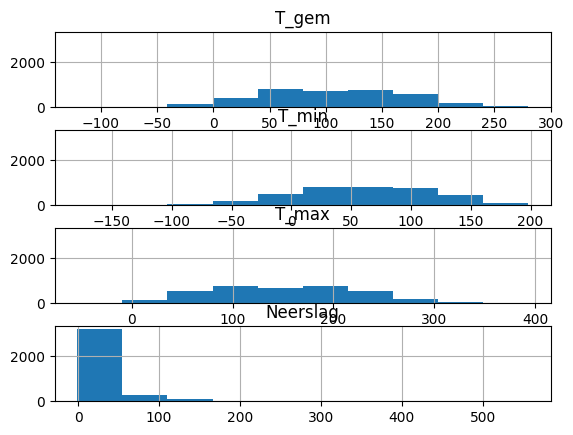

In [41]:
knmi_data.hist(layout=(4,1), sharey=True)

Hier valt op:

- Neerslag is niet mooi normaal verdeeld, maar lijkt meer log-normaal. 
- De temperaturen zijn wel mooi normaal verdeeld. 
- De minimum temperatuur is gemiddeld het laagst, met daaropvolgend de gemiddelde en maximum temperatuur. Dit is consistent met de verwachting voor deze variabelen

### Variabelen in verband met elkaar
De variabelen laten de volgende correlatie zien:

In [42]:
knmi_data.corr()

,T_gem,T_min,T_max,Neerslag
T_gem,1.000000,0.921583,0.967963,0.063357
T_min,0.921583,1.000000,0.815801,0.172257
T_max,0.967963,0.815801,1.000000,0.001573
Neerslag,0.063357,0.172257,0.001573,1.000000


<Axes: >

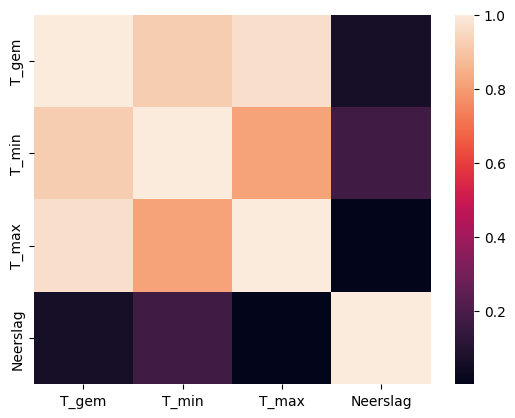

In [44]:
import seaborn as sns

sns.heatmap(knmi_data.corr())

Hieruit komt naar voren dat de temperaturen sterk aan elkaar gecorreleerd zijn. Dit is logisch: als de gemiddelde temperatuur hoog is, verwacht je ook dat de maximum en minimum temperatuur hoog zijn. 

De temperaturen en de neerslag is niet sterk aan elkaar gekoppeld. Op het eerste gezicht lijkt het dus niet zo dat het meer regent op dagen met een bepaalde temperatuur (laag of hoog). 

Het beeld van de correlatie wordt bevestigd door de set aan scatterplots:

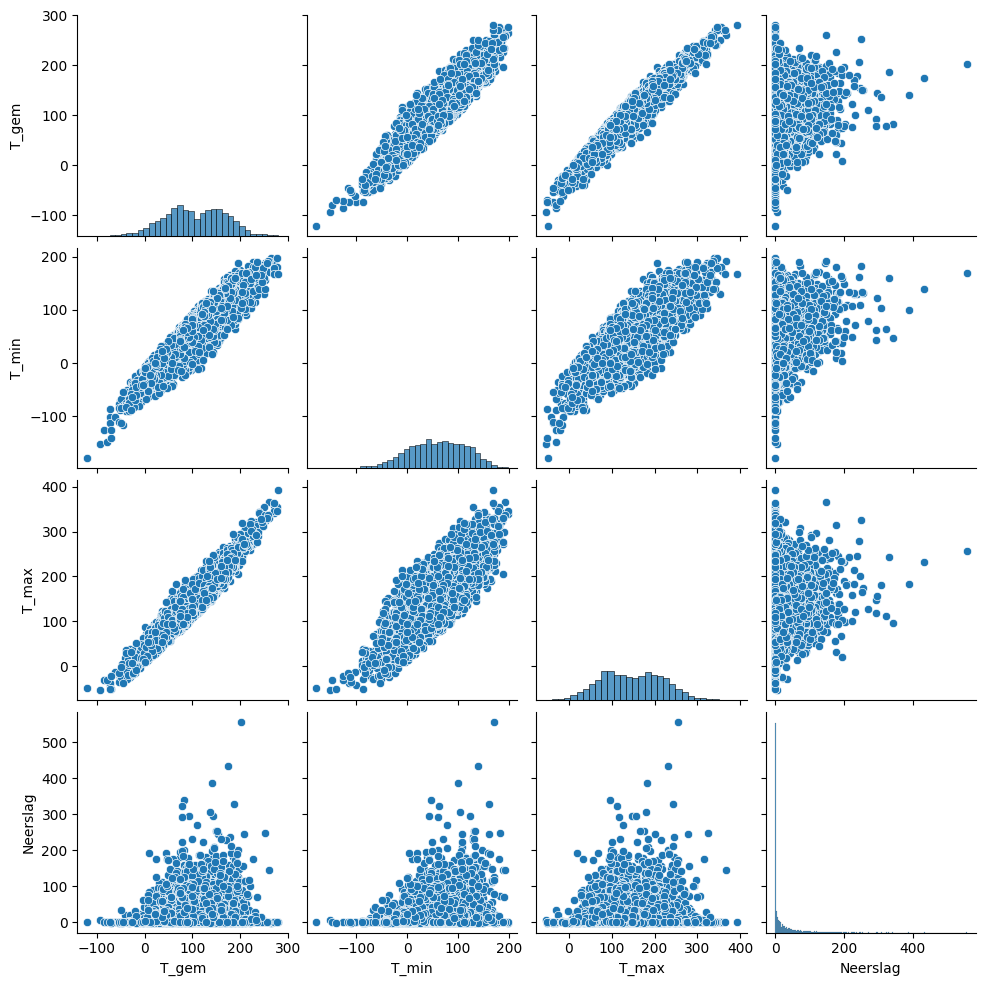

In [45]:
sns.pairplot(knmi_data)

Deze plots nuanceren het beeld rondom de lage correlatie met neerslag wel: over het algemeen geen sterke correlatie, maar de sterkste neerslag vind wel plaats bij hogere temperaturen. 

Naast de correlatie is het ook goed om te kijken naar de ontwikkeling in de tijd:

array([<Axes: xlabel='datum'>, <Axes: xlabel='datum'>,
       <Axes: xlabel='datum'>, <Axes: xlabel='datum'>], dtype=object)

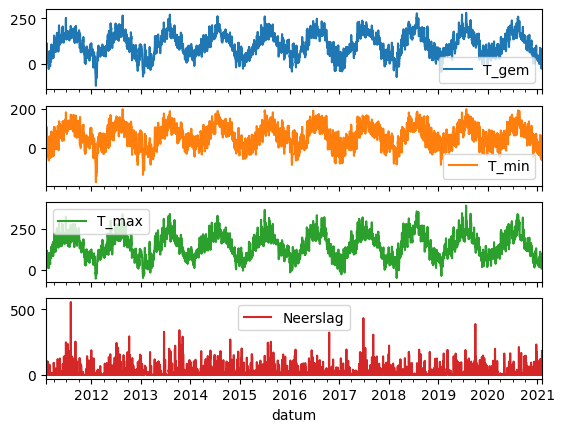

In [46]:
knmi_data.reset_index().drop(columns='station').plot(x='datum', subplots=True)

Hier is duidelijk een jaarlijkse gang in te zien: warm in de zomer en koud in de winter. Verder is de hoeveelheid neerslag hoger in de lente. Er lijkt zo om het eerste gezicht niet een sterke toename 

# Data preparation
Een aantal bewerkingsstappen komen voort uit de Data Understanding:

In [48]:
# Van 0.1 graden naar graden C
knmi_data[['T_gem', 'T_min', 'T_max']] = knmi_data[['T_gem', 'T_min', 'T_max']] / 10

# Modeling
Een regressie model tussen neerslag en temperatuur laat geen verband zien, en ook geen verloop in de tijd. 

# Evaluation
Op deze korte dataset van 1 station is er geen duidelijke shift te zien in patronen. Ons vermoeden is dat de huidige dataset simpelweg te beperkt is om een trend te spotten. We zullen terug naar de klant moeten om meer data te verzamelen. 